Surface coverage of each species

In [3]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from arguments import get_args
args = get_args()

# 读取所有algo的interpolate过的res，然后挨个出图
algos = ["alg0", "alg1", "alg2", "alg3"]
# algos = ["alg0", "alg1", "alg3", "alg2"]
# labels = ["alg0", "alg1", "alg2", "alg3"]

# 统一放在这个路径下了
datapath = "coverage_data/"
savepath = "24_2_12_coverage/"
if not os.path.exists(savepath):
    os.makedirs(savepath)

Namespace(exp_name='nh3', lattice_size=50, sim_round=10000000, num_samples=50, end_time=0.00011, alg1_lambda=1.5e-09, alg2_lambda=1, alg3_lambda=0.01, tau_max=1e-08, algo=1, path='24_2_1_alg1/')


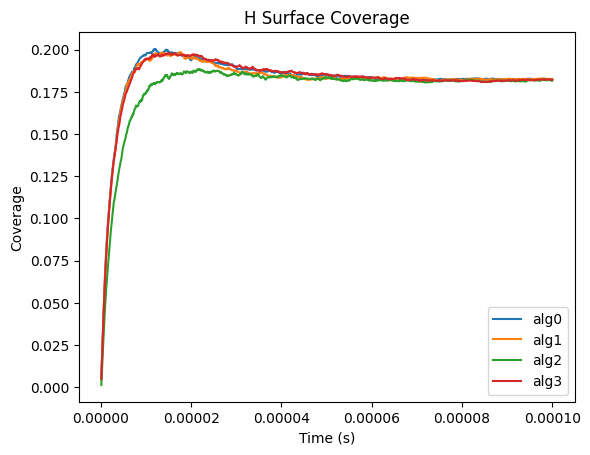

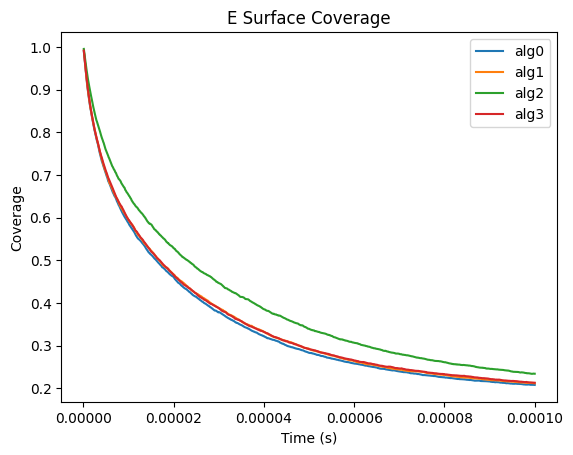

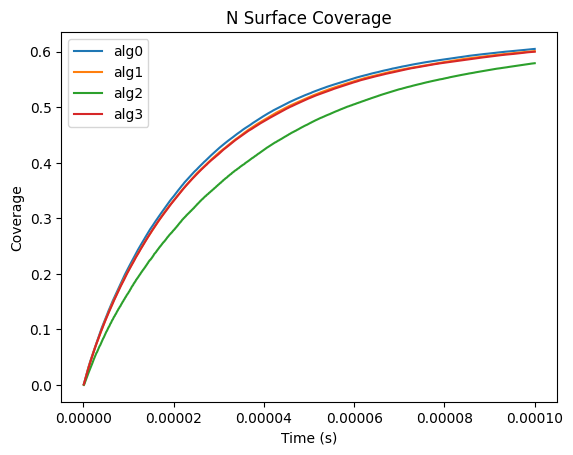

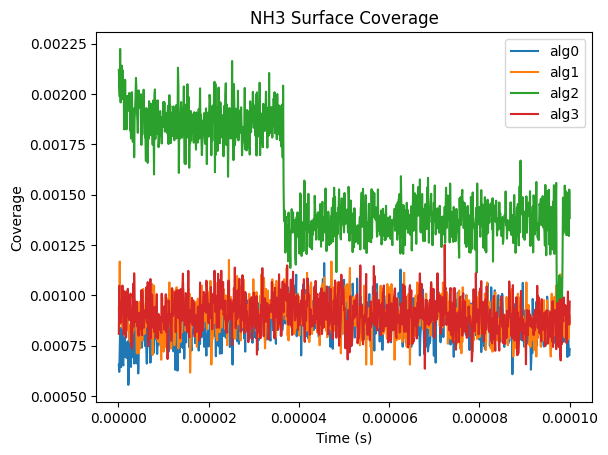

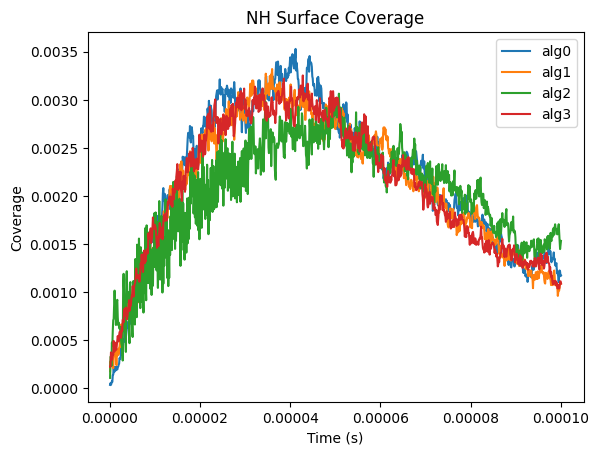

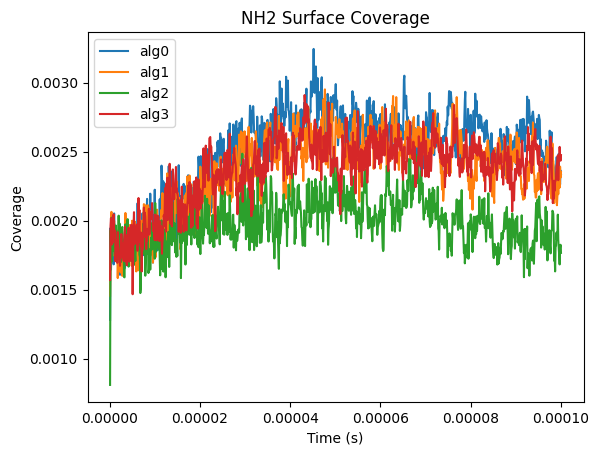

<Figure size 640x480 with 0 Axes>

In [4]:
for specie_idx in range(len(args.sim.species_names)):
    if args.sim._init_state[specie_idx] == 0: # ignore species that cannot stay on the surface
        continue
    for idx, algo in enumerate(algos):
        file_name = os.path.join(datapath, f"{algo}_size_{args.lattice_size}_sample_{args.num_samples}_{args.sim.species_names[specie_idx]}.txt")
        if not os.path.exists(file_name):
            print(f"{file_name} does not exist, ignored")
            continue
        # 打开文本文件
        with open(file_name, 'r') as file:
            lines = file.readlines()

        # read coverage data from file
        for i, line in enumerate(lines):
            if "res in list" in line:
                list_line = lines[i+1]
                break
        try:
            result_list = eval(list_line)
            # print(result_list)
        except Exception as e:
            print(f"error when evaluating list: {e}")

        # read time stamps from file
        for i, line in enumerate(lines):
            if "time stamps in list" in line:
                list_line = lines[i+1]
                break
        try:
            timestamp_list = eval(list_line)
            # print(timestamp_list)
        except Exception as e:
            print(f"error when evaluating list: {e}")

        plt.plot(timestamp_list, result_list, label=algos[idx])
    
    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("Coverage")
    sp_name = args.sim.species_names[specie_idx]
    if sp_name.endswith("_s"):
        sp_name = sp_name[:-2]
    plt.title(f"{sp_name} Surface Coverage")
    
    plt.savefig(os.path.join(savepath, f"{sp_name}.png"))
    plt.savefig(os.path.join(savepath, f"{sp_name}.pdf"))
    plt.show()
    plt.clf()